In [1]:
# importing libraries
import pandas as panda
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# reading the csv file 
nas_data = panda.read_csv('NAS.csv')
nas_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
5,2003-12-25,NaN,NaN,NaN,NaN,NaN,NaN
6,2003-12-26,NaN,NaN,NaN,NaN,NaN,NaN
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
9,2003-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# seeing how many nulls there are in the dataset, False = not null, True = Null
nas_data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...
4248,False,False,False,False,False,False,False
4249,False,False,False,False,False,False,False
4250,False,False,False,False,False,False,False
4251,False,False,False,False,False,False,False


In [4]:
# sum of how many nulls there are in each column  
nas_data.isnull().sum()

Date          0
Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

In [5]:
nas_data.dropna(inplace = True)

In [6]:
nas_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# now we have removed the nulls in the dataset 
nas_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
11,2004-01-02,17.940001,18.054300,17.768600,17.768600,17.768600,322923.0
12,2004-01-05,18.054300,18.054300,17.711500,17.711500,17.711500,182782.0
13,2004-01-06,17.940001,17.997101,17.597200,17.597200,17.597200,300054.0
14,2004-01-07,17.425800,17.711500,17.140100,17.140100,17.140100,189937.0


In [8]:
nas_data.drop(["High", "Low", "Open", "Adj Close", "Volume"], axis="columns", inplace=True)
nas_data['Date'] = nas_data['Date'].str.replace('-','')
nas_data = nas_data.astype({"Date": int, "Close": float})


In [9]:
nas_data.head(10)

,Date,Close
0,20031218,19.139799
1,20031219,18.454201
2,20031222,18.054300
3,20031223,17.425800
7,20031229,17.254400
8,20031230,17.711500
11,20040102,17.768600
12,20040105,17.711500
13,20040106,17.597200
14,20040107,17.140100


In [10]:
input = nas_data.drop('Close',axis='columns')
input.head(10)

,Date
0,20031218
1,20031219
2,20031222
3,20031223
7,20031229
8,20031230
11,20040102
12,20040105
13,20040106
14,20040107


In [11]:
close = nas_data.Close
close

0       19.139799
1       18.454201
2       18.054300
3       17.425800
7       17.254400
          ...    
4248     0.676800
4249     0.600600
4250     0.626000
4251     0.605000
4252     0.610600
Name: Close, Length: 4218, dtype: float64

In [12]:
# Creating linear regression object
regObject = linear_model.LinearRegression()
regObject.fit(input,close)

LinearRegression()

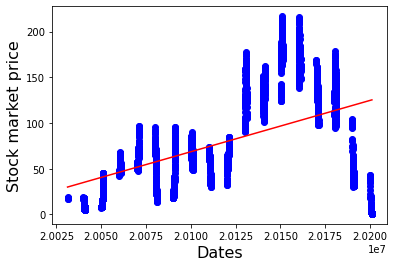

In [13]:
# matplotlib labels
plt.xlabel('Dates',fontsize=16)
plt.ylabel('Stock market price',fontsize=16)


# Visual Represention of linear equation with Linear Regression
plt.scatter(nas_data.Date, nas_data.Close, color = 'blue')
plt.plot(nas_data.Date, regObject.predict(nas_data[['Date']]), color='red')

# We did not know how to fix the dates in the visualization since we made the date into int, however when writing 
# nas['Date'] = pd.to_datetime(nas['Date']) instead the graph shows clearly and the years as well but the prediction afterwards turns negative. 
# So we decided to do this instead since it shows the right prediction 

In [14]:
# predicting stock market price for the date  2021-12-21
regObject.predict([[20211221]])

array([131.08262076])